In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the edges
def load_graph(edge_file):
    edges = pd.read_csv(edge_file, header=None, names=["source", "target"])
    G = nx.Graph()
    G.add_edges_from(edges.values)
    return G

# Load the graph
G = load_graph("edges.csv")

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# Identify the highest degree node
highest_degree_node = max(G.degree, key=lambda x: x[1])[0]

Number of nodes: 28283
Number of edges: 92753


In [3]:
# Convert to directed graph if needed
G = G.to_directed()

# Sort by in-degree and keep top 100
top_100_nodes = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:100]
top_100_node_ids = [node for node, _ in top_100_nodes]

# Subgraph
G_sub = G.subgraph(top_100_node_ids).copy()

print(top_100_nodes)

[('867', 172), ('396', 152), ('1878', 145), ('24904', 117), ('5989', 112), ('24069', 110), ('17963', 96), ('23143', 94), ('11080', 93), ('21798', 92), ('24061', 91), ('16276', 91), ('20162', 89), ('7205', 88), ('406', 87), ('21438', 85), ('5691', 85), ('4581', 84), ('23932', 81), ('10935', 81), ('24062', 80), ('22425', 80), ('2518', 79), ('1925', 79), ('24122', 77), ('25329', 77), ('5978', 76), ('22581', 74), ('24127', 74), ('27867', 74), ('18669', 73), ('8924', 73), ('1', 72), ('9252', 72), ('5832', 71), ('7950', 68), ('18679', 67), ('27821', 66), ('3734', 66), ('9465', 66), ('14033', 66), ('22416', 65), ('1767', 65), ('23619', 64), ('1349', 64), ('14971', 64), ('24104', 64), ('5984', 63), ('14771', 63), ('8730', 63), ('18369', 62), ('3059', 62), ('11295', 61), ('1181', 61), ('24005', 61), ('341', 60), ('18521', 60), ('9226', 60), ('19068', 60), ('21079', 59), ('19712', 59), ('10767', 59), ('13091', 59), ('7987', 59), ('18823', 59), ('3634', 58), ('12228', 58), ('14555', 58), ('6972',

In [4]:
# a) Visualizing with Gephi (exporting graph for Gephi use)
nx.write_gexf(G_sub, "gsub_graph.gexf")
print(f"Graph exported to gsub_graph.gexf. Highest degree node: {highest_degree_node}")

Graph exported to gsub_graph.gexf. Highest degree node: 867


In [5]:
# b) Enumerate the components and indicate the size of each
components = list(nx.weakly_connected_components(G_sub))
print("Number of components:", len(components))

for i, comp in enumerate(components):
    print(f"Component {i+1}: Size = {len(comp)}")

Number of components: 12
Component 1: Size = 63
Component 2: Size = 26
Component 3: Size = 1
Component 4: Size = 1
Component 5: Size = 1
Component 6: Size = 1
Component 7: Size = 1
Component 8: Size = 1
Component 9: Size = 1
Component 10: Size = 1
Component 11: Size = 1
Component 12: Size = 2


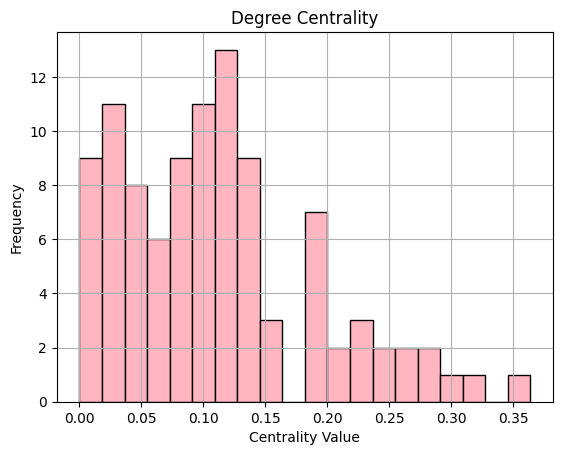

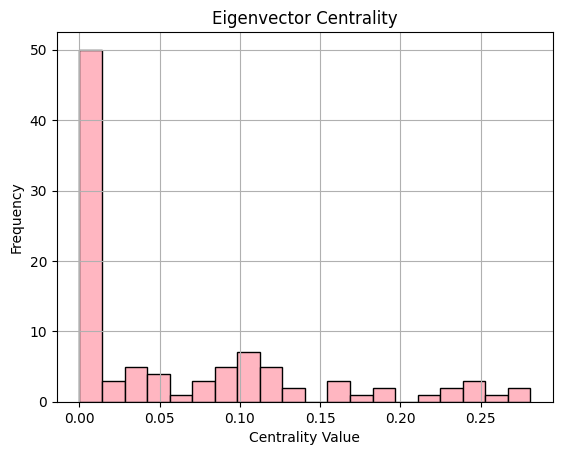

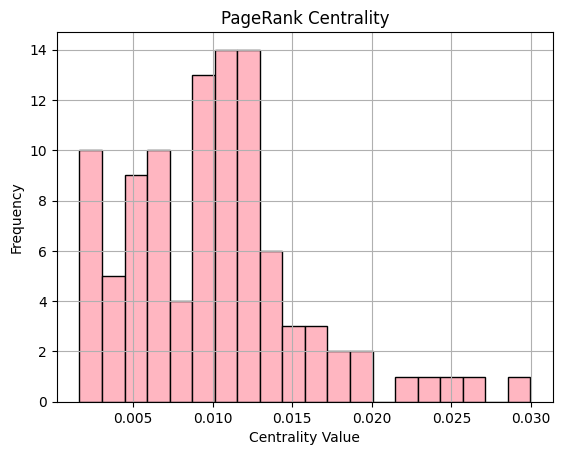

In [6]:
# Centralities
degree_centrality = nx.degree_centrality(G_sub)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G_sub)
pagerank_centrality = nx.pagerank(G_sub)
closeness_centrality = nx.closeness_centrality(G_sub)
betweenness_centrality = nx.betweenness_centrality(G_sub)

# Function to plot histograms
def plot_centrality_hist(data, title):
    plt.figure()
    plt.hist(list(data.values()), bins=20, color='lightpink', edgecolor='black')
    plt.title(title)
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# c) Plot first set
plot_centrality_hist(degree_centrality, "Degree Centrality")
plot_centrality_hist(eigenvector_centrality, "Eigenvector Centrality")
plot_centrality_hist(pagerank_centrality, "PageRank Centrality")

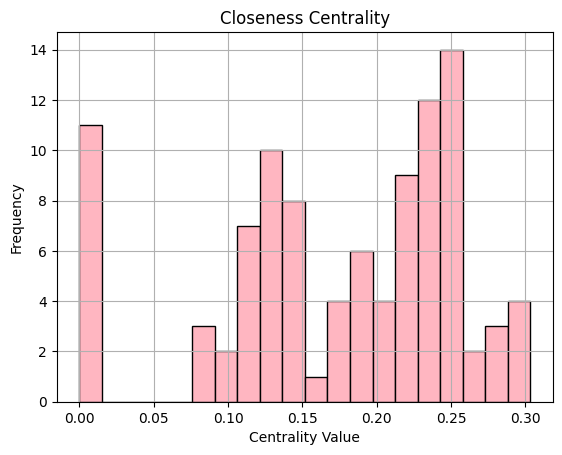

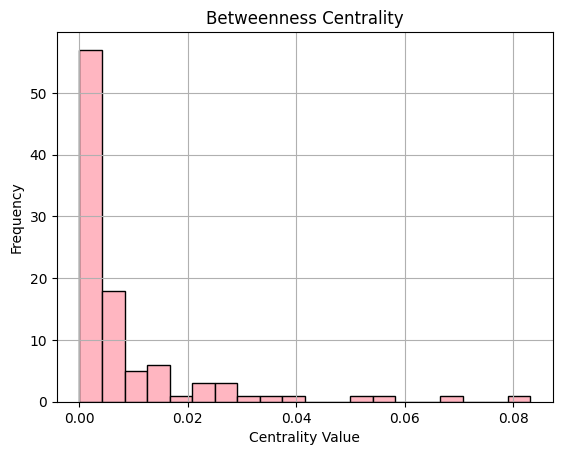

In [7]:
# d) Plot second set
plot_centrality_hist(closeness_centrality, "Closeness Centrality")
plot_centrality_hist(betweenness_centrality, "Betweenness Centrality")

In [8]:
# e) Repeat for largest component
largest_component = max(nx.weakly_connected_components(G_sub), key=len)
G_largest = G_sub.subgraph(largest_component).copy()

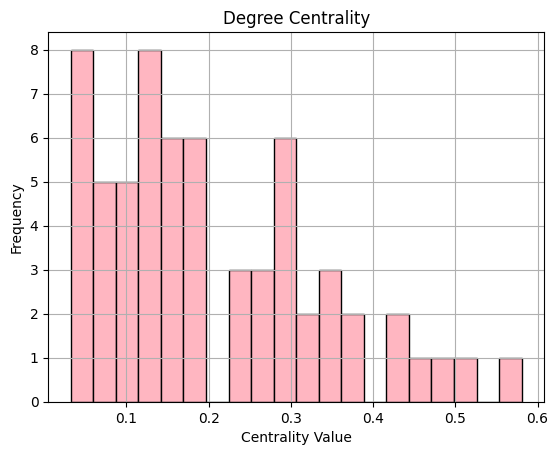

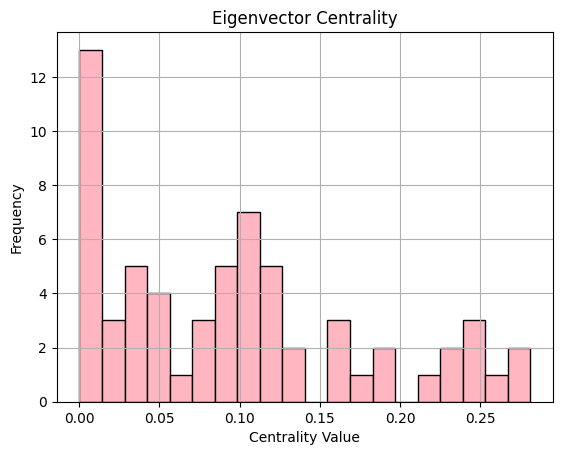

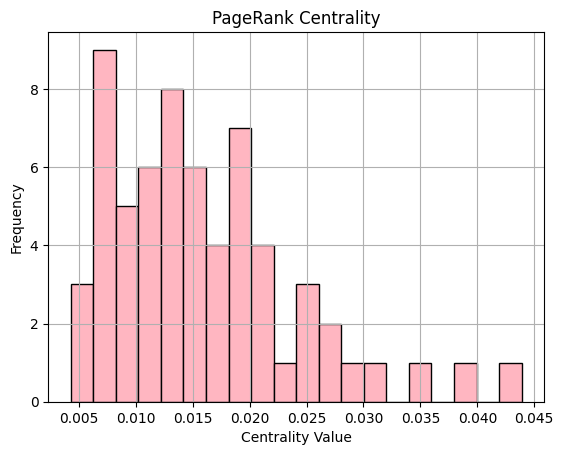

In [9]:
# Centralities
degree_centrality_g_largest = nx.degree_centrality(G_largest)
eigenvector_centrality_g_largest = nx.eigenvector_centrality_numpy(G_largest)
pagerank_centrality_g_largest = nx.pagerank(G_largest)
closeness_centrality_g_largest = nx.closeness_centrality(G_largest)
betweenness_centrality_g_largest = nx.betweenness_centrality(G_largest)

plot_centrality_hist(degree_centrality_g_largest, "Degree Centrality")
plot_centrality_hist(eigenvector_centrality_g_largest, "Eigenvector Centrality")
plot_centrality_hist(pagerank_centrality_g_largest, "PageRank Centrality")

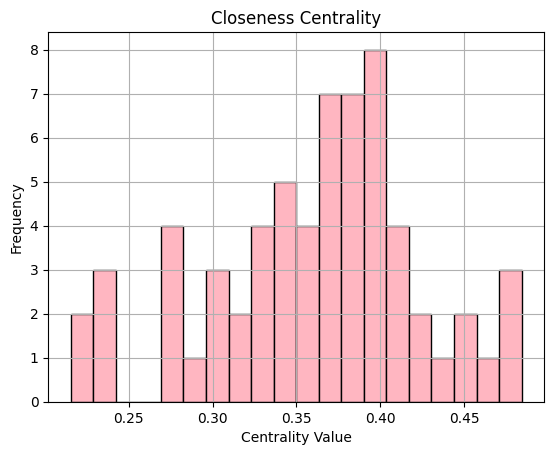

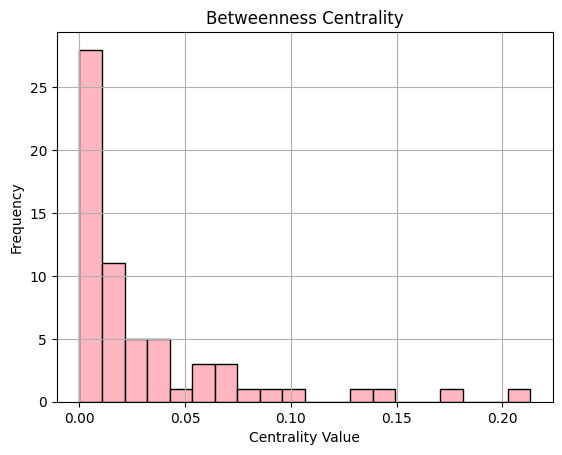

In [10]:
plot_centrality_hist(closeness_centrality_g_largest, "Closeness Centrality")
plot_centrality_hist(betweenness_centrality_g_largest, "Betweenness Centrality")

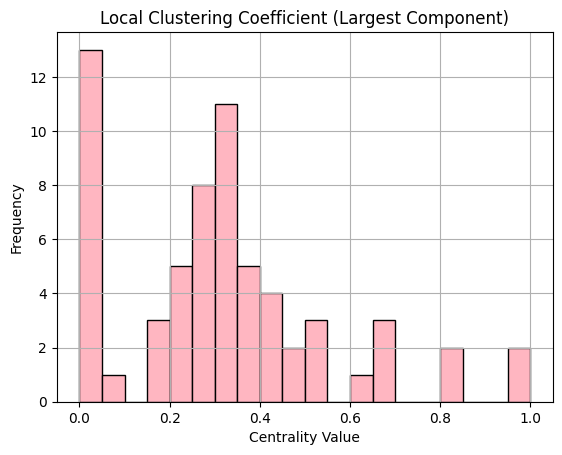

Global Clustering Coefficient: 0.3114754098360656
Is the graph bipartite? False


In [11]:
# f) Local clustering coefficient distribution for largest component
clustering_coeffs = nx.clustering(G_largest.to_undirected())  # For clustering, use undirected
plot_centrality_hist(clustering_coeffs, "Local Clustering Coefficient (Largest Component)")

# g) Global clustering coefficient
global_clustering = nx.transitivity(G_sub)
print(f"Global Clustering Coefficient: {global_clustering}")

# h) Identify bipartite subgraph
is_bipartite = nx.is_bipartite(G_sub)
print(f"Is the graph bipartite? {is_bipartite}")
if is_bipartite:
    top_nodes, bottom_nodes = nx.bipartite.sets(G_sub)
    bipartite_subgraph = G_sub.subgraph(top_nodes | bottom_nodes)
    print(f"Bipartite subgraph has {len(bipartite_subgraph.nodes())} nodes and {len(bipartite_subgraph.edges())} edges.")

In [12]:
pip install powerlaw

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import numpy as np
import powerlaw

In [15]:
G = nx.read_edgelist("Facebook dataset/facebook_combined.txt", nodetype=int)
# Degree is same as in-degree for undirected graphs
in_degrees = dict(G.degree())
subset_nodes = [n for n, d in in_degrees.items() if 2 <= d <= 10][:100]
G_sub = G.subgraph(subset_nodes).copy()

In [16]:
deg_cent = nx.degree_centrality(G_sub)
clo_cent = nx.closeness_centrality(G_sub)
btw_cent = nx.betweenness_centrality(G_sub)

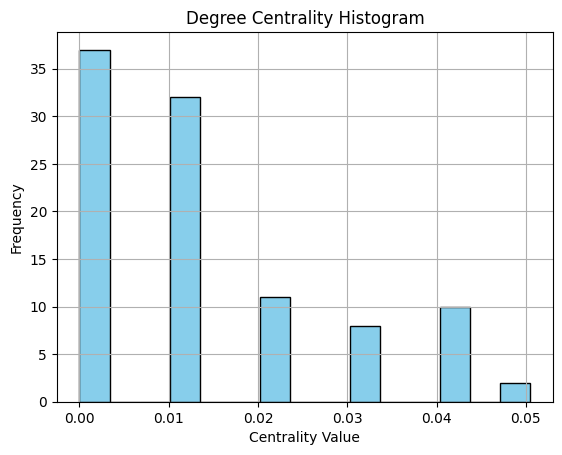

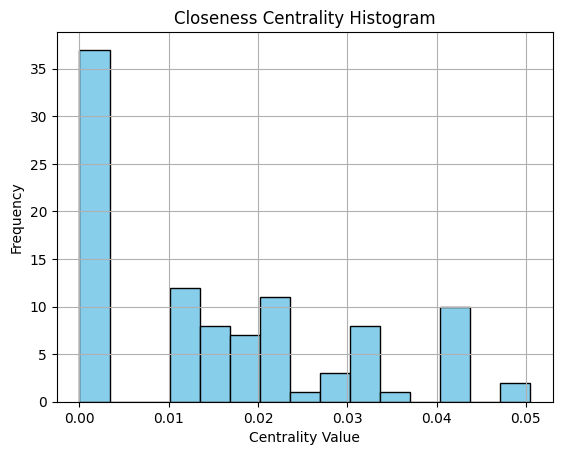

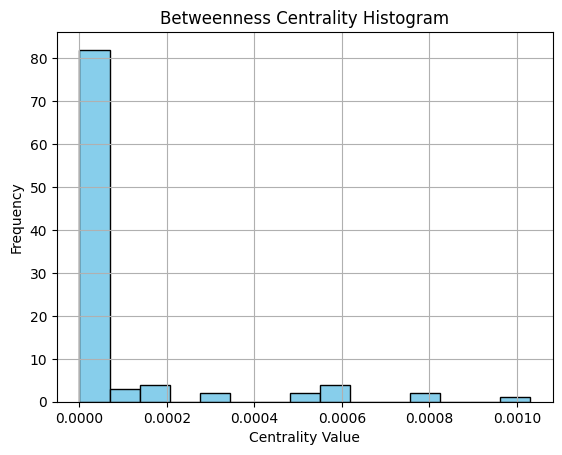

In [17]:
def plot_hist(data, title):
    plt.figure()
    plt.hist(list(data.values()), bins=15, color='skyblue', edgecolor='black')
    plt.title(f"{title} Histogram")
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

plot_hist(deg_cent, "Degree Centrality")
plot_hist(clo_cent, "Closeness Centrality")
plot_hist(btw_cent, "Betweenness Centrality")

In [18]:
def top_two_nodes(centrality_dict):
    sorted_nodes = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_nodes[0][0], sorted_nodes[1][0]

for name, centrality in [("Degree", deg_cent), ("Closeness", clo_cent), ("Betweenness", btw_cent)]:
    n1, n2 = top_two_nodes(centrality)
    try:
        distance = nx.shortest_path_length(G_sub, source=n1, target=n2)
        print(f"{name} Centrality: Distance between node {n1} and node {n2} = {distance}")
    except nx.NetworkXNoPath:
        print(f"{name} Centrality: No path between node {n1} and node {n2}")

Degree Centrality: Distance between node 4 and node 181 = 1
Closeness Centrality: Distance between node 4 and node 181 = 1
Betweenness Centrality: No path between node 230 and node 193


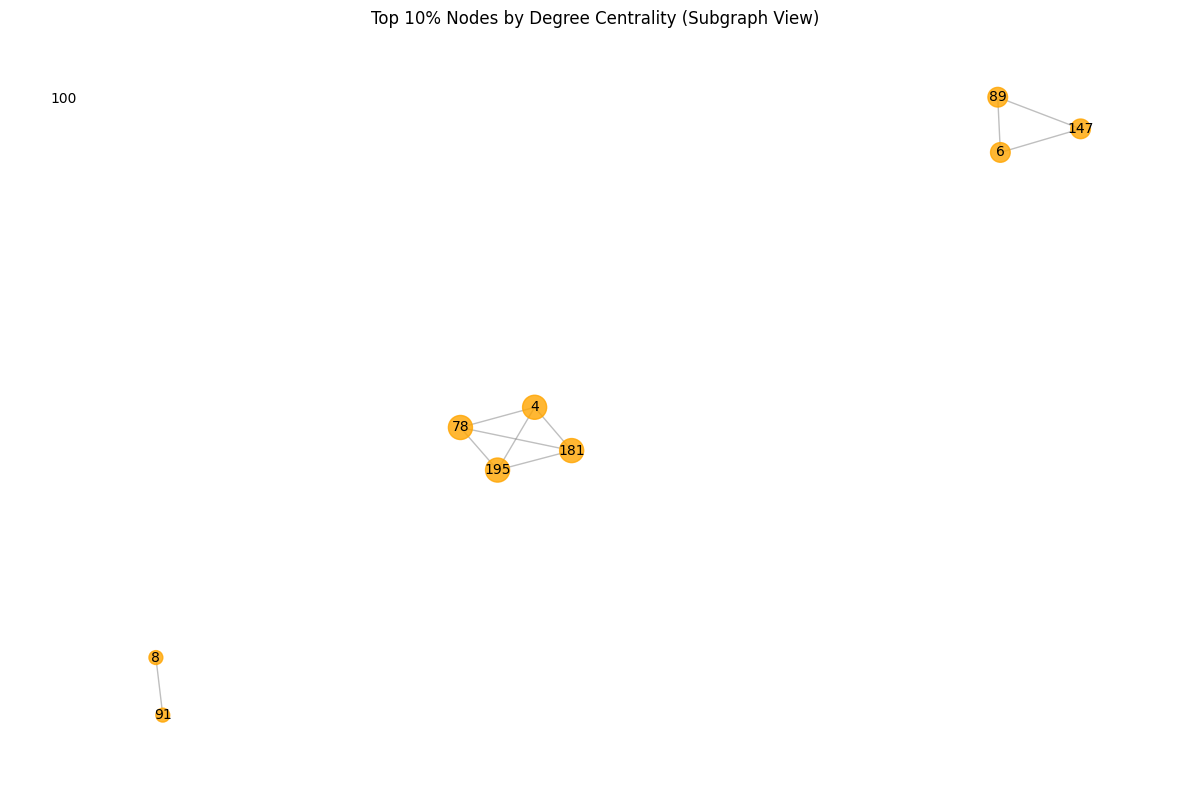

In [19]:
degree_centrality = nx.degree_centrality(G_sub)

sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

top_percent = 10
top_n = int(len(sorted_nodes) * (top_percent / 100))
top_nodes = sorted_nodes[:top_n]

subgraph = G_sub.subgraph(top_nodes).copy()

degrees = dict(subgraph.degree())
node_sizes = [degrees[n] * 100 for n in subgraph.nodes()] 

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, k=0.4, iterations=50)
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color='orange', alpha=0.8)
nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_size=10)

plt.title(f"Top {top_percent}% Nodes by Degree Centrality (Subgraph View)")
plt.axis('off')
plt.tight_layout()
plt.show()

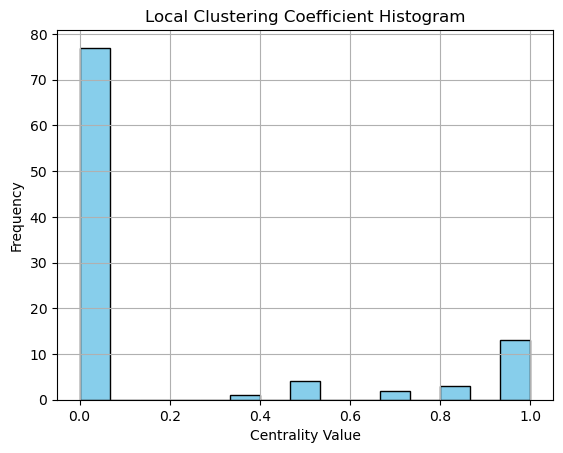

No path between 32 and 64


In [ ]:
clustering = nx.clustering(G_sub)
plot_hist(clustering, "Local Clustering Coefficient")

# Top 2 nodes
n1, n2 = top_two_nodes(clustering)
try:
    dist = nx.shortest_path_length(G_sub, source=n1, target=n2)
    print(f"Shortest path between nodes with top clustering coefficients ({n1}, {n2}): {dist}")
except nx.NetworkXNoPath:
    print(f"No path between {n1} and {n2}")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


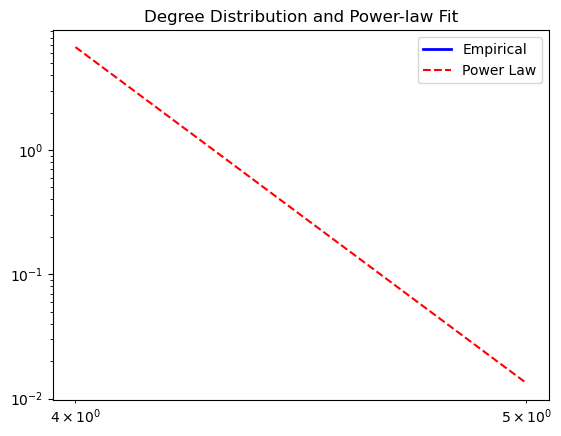

Power-law fit vs exponential: Loglikelihood ratio = 0.9174604050470765, p-value = 0.0014486711043864822


In [ ]:
degrees = [d for n, d in G_sub.degree()]
fit = powerlaw.Fit(degrees)

# Plot and compare to power law
fig = fit.plot_pdf(color='blue', linewidth=2)
fit.power_law.plot_pdf(color='red', linestyle='--', ax=fig)
plt.title("Degree Distribution and Power-law Fit")
plt.legend(['Empirical', 'Power Law'])
plt.show()

# Check if power law is a good fit
R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Power-law fit vs exponential: Loglikelihood ratio = {R}, p-value = {p}")